# Set Up

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from copy import deepcopy
from scipy.stats import pearsonr
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/Work-Notebooks/120-videos-analysis/120vids.csv').drop(['Unnamed: 0','vid_id'], axis=1)
df.describe()

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,40437.000000,40437.00000,40437.000000,40437.000000,40437.000000,40437.00000,40437.000000,40437.000000,40437.000000,40437.000000,40330.00000,40330.000000,40437.000000,40437.000000,40437.000000,40437.000000,40437.000000,40437.000000
mean,73.218810,93.43569,0.002498,0.645459,1927.005317,93.43569,0.013281,0.055133,12704.470732,1.907553,-43.42824,-30.092616,4.306501,6.303212,6.410688,454.670549,73.218810,527.889359
std,358.785943,113.62126,0.012834,3.564626,2300.050026,113.62126,0.020414,0.041186,13873.614405,1.502965,23.53273,28.026262,7.695809,7.703020,8.088110,740.784363,358.785943,918.791820
min,0.000000,1.00000,0.000000,0.000000,1.000000,1.00000,0.000078,0.001030,1.000000,1.000000,-91.00000,-91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,22.00000,0.000208,0.090909,567.000000,22.00000,0.002966,0.029496,3786.000000,1.333333,-52.10000,-35.800000,0.000000,2.000000,2.000000,115.000000,3.000000,126.000000
50%,11.000000,45.00000,0.000796,0.259259,1045.000000,45.00000,0.007563,0.044927,8155.000000,1.622222,-34.50000,-18.800000,2.000000,4.000000,4.000000,222.000000,11.000000,244.000000
75%,42.000000,114.00000,0.002295,0.571429,2535.000000,114.00000,0.016745,0.068047,13487.000000,2.081395,-26.60000,-11.400000,5.000000,8.000000,8.000000,480.000000,42.000000,546.000000
max,14009.000000,664.00000,1.000000,164.469880,16551.000000,664.00000,1.000000,1.000000,51392.000000,98.745283,-7.50000,-0.000000,150.000000,150.000000,150.000000,19320.000000,14009.000000,20849.000000


In [3]:
features = [col for col in df.columns if col != 'ccc_overlap']
features

['emoticonusage_num_emo',
 'emoticonusage_chunk_unique_users',
 'emoticonusage_perc_emoji_of_stream',
 'emoticonusage_emoji_user_ratio',
 'uniqueusersengagement_hour_unique_users',
 'uniqueusersengagement_chunk_unique_users',
 'uniqueusersengagement_chunk_to_stream_unique_users',
 'uniqueusersengagement_chunk_to_hour_unique_users',
 'uniqueusersengagement_stream_unique_users',
 'meanchatrateperuniqueusers_mean_chat_rate_per_minute',
 'audiolevel_mean_volume',
 'audiolevel_max_volume',
 'activeusersengagement_num_chats_by_top_emoji_users',
 'activeusersengagement_num_chats_by_top_words_users',
 'activeusersengagement_num_chats_by_top_words_emoji_users',
 'userengagement_num_words',
 'userengagement_num_emo',
 'userengagement_num_words_emo']

# Helper Functions

In [4]:
def isolate_hori_df(old, min_val = np.NINF, max_val = np.Inf):
    new = deepcopy(old)
    for i, entry in new.iterrows():
        if entry['emoticonusage_num_emo'] < min_val or entry['emoticonusage_num_emo'] > max_val:
            new.drop([i], inplace=True)
    return new

In [5]:
def isolate_vert_df(old, min_val = np.NINF, max_val = np.Inf):
    new = deepcopy(old)
    for i, entry in new.iterrows():
        if i < min_val or i > max_val:
            new.drop([i], inplace=True)
    return new

In [6]:
def to_pearson(df):
    data = pd.DataFrame(columns=['Pearson Corr Coefficient'], index=[features])
    x = df['emoticonusage_num_emo']
    for cat in df:
        y = df[cat]
        if cat.find('num_emo') == -1:
            data['Pearson Corr Coefficient'][cat] = np.abs(pearsonr(x, y)[0])
    data = data.sort_values(by=['Pearson Corr Coefficient'], ascending=False)
    return data.dropna()

# Non CCC Exploration

In [7]:
non_ccc = df[df['ccc_overlap'] == False]
non_ccc.describe()

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000,39382.000000,39382.000000,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000,39483.000000
mean,72.534534,90.953879,0.002410,0.649277,1893.790289,90.953879,0.012926,0.054457,12705.544260,1.905405,-43.397717,-30.043934,4.283742,6.266292,6.372844,448.244992,72.534534,520.779525
std,361.039032,110.975167,0.012770,3.604474,2241.787151,110.975167,0.020015,0.040610,13876.142127,1.477035,23.507928,27.995156,7.675222,7.671343,8.066580,738.753419,361.039032,917.940962
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000078,0.001030,1.000000,1.000000,-91.000000,-91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,22.000000,0.000199,0.090909,550.000000,22.000000,0.002910,0.029233,3786.000000,1.333333,-52.100000,-35.700000,0.000000,2.000000,2.000000,114.000000,3.000000,125.000000
50%,11.000000,44.000000,0.000764,0.258824,1038.000000,44.000000,0.007323,0.044476,8155.000000,1.620690,-34.500000,-18.700000,2.000000,4.000000,4.000000,219.000000,11.000000,241.000000
75%,41.000000,110.000000,0.002221,0.571429,2483.000000,110.000000,0.016256,0.067227,13487.000000,2.076923,-26.525000,-11.400000,5.000000,8.000000,8.000000,469.000000,41.000000,532.500000
max,14009.000000,664.000000,1.000000,164.469880,16551.000000,664.000000,1.000000,1.000000,51392.000000,98.745283,-7.500000,-0.000000,147.000000,150.000000,150.000000,19320.000000,14009.000000,20849.000000


## Vertical Outlier Exploration

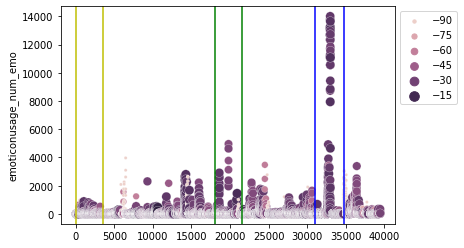

In [8]:
# Around entry ~32000 we see a massive group of outliers which range from around
# 7000 to as high as 14000 in terms of emoticon numbers observed

# The below graph is a scatter plot with x=(video number) and y=(number of emoticons)
# with the size/color representing the mean audio levels of the given clips

# There appears to be a trend, highlighted by the green and blue columns, in the audio
# level and the emoticon usage in the outliers within the dataset

# The yellow column highlights the typical low level outliers

sns.scatterplot(data=non_ccc, x=range(len(non_ccc)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))
plt.axvline(x=0, color='y', linestyle='-')
plt.axvline(x=3500, color='y', linestyle='-')
plt.axvline(x=18000, color='g', linestyle='-')
plt.axvline(x=21500, color='g', linestyle='-')
plt.axvline(x=31000, color='b', linestyle='-')
plt.axvline(x=34800, color='b', linestyle='-')
plt.legend(bbox_to_anchor= (1.2,1))

In [9]:
# Isolating the 3 levels of outliers in the non_ccc dataset
# into their own subsets of low, mid, and high

df_sm = (isolate_vert_df(non_ccc, 250, 3300).dropna())
df_md = (isolate_vert_df(non_ccc, 17500, 22000).dropna())
df_lg = (isolate_vert_df(non_ccc, 33000, 34000).dropna())

### Direct Comparison Vertical

In [10]:
discard = ['min', '25%', '50%']

sm = df_sm.abs().describe().drop(index=discard).values
md = df_md.abs().describe().drop(index=discard).values
lg = df_lg.abs().describe().drop(index=discard).values


# df_md subtracted by df_sm
md_sub_sm = np.subtract(md, sm)
md_sub_sm = pd.DataFrame(np.subtract(sm, md),
                         columns=df_sm.describe().drop(index=discard).columns,
                         index=df_sm.describe().drop(index=discard).index)

# df_lg subtracted by df_sm
lg_sub_sm = np.subtract(lg, sm)
lg_sub_sm = pd.DataFrame(np.subtract(lg, sm),
                         columns=df_sm.describe().drop(index=discard).columns,
                         index=df_sm.describe().drop(index=discard).index)

# df_lg subtracted by df_md
lg_sub_md = np.subtract(lg, md)
lg_sub_md = pd.DataFrame(np.subtract(lg, md),
                         columns=df_sm.describe().drop(index=discard).columns,
                         index=df_sm.describe().drop(index=discard).index)

In [11]:
md_sub_sm

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000,-1404.000000
mean,17.542887,9.618646,-0.001642,-0.019046,833.243824,9.618646,-0.007986,-0.009395,38850.215714,0.742946,-6.459529,-9.308830,14.268461,11.142594,11.328105,132.640925,17.542887,150.183812
std,-96.779145,-14.310443,-0.006952,-4.241053,-182.270077,-14.310443,-0.011677,-0.006019,6393.069224,-1.528841,-7.590744,-11.418085,8.209093,5.595754,5.263726,271.586880,-96.779145,236.434232
75%,33.000000,31.000000,-0.001320,0.225939,1991.000000,31.000000,-0.011475,-0.008280,37992.000000,1.232917,-11.350000,-11.400000,22.000000,18.000000,18.000000,207.000000,33.000000,240.000000
max,-4003.000000,-174.000000,-0.176722,-148.475115,-5450.000000,-174.000000,-0.274373,-0.096089,27490.000000,-83.300142,-3.700000,-14.700000,32.000000,-29.000000,-29.000000,2743.000000,-4003.000000,2816.000000


In [12]:
lg_sub_sm

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000,-2073.000000
mean,608.559946,85.107003,0.002416,4.190592,1189.195476,85.107003,0.016158,0.018637,-35368.430790,0.922116,7.420592,11.035744,-2.347795,0.162834,2.760319,1107.561849,608.559946,1716.121795
std,1870.996965,57.785566,0.003127,18.378600,2627.891216,57.785566,0.002780,-0.000356,4265.510522,2.292280,7.597468,11.903193,11.452455,6.146552,10.007925,1078.513946,1870.996965,2228.176585
75%,505.250000,146.750000,0.002660,1.760935,-517.000000,146.750000,0.025848,0.032924,-43348.000000,1.607530,4.300000,6.375000,-7.000000,-3.000000,1.000000,2177.750000,505.250000,3077.250000
max,13051.000000,157.000000,0.015656,152.912737,9586.000000,157.000000,-0.160082,-0.226609,-1676.000000,6.353482,3.700000,14.700000,19.000000,-10.000000,-5.000000,-4542.000000,13051.000000,2972.000000


In [13]:
lg_sub_md

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000,-3477.000000
mean,626.102833,94.725649,0.000774,4.171546,2022.439299,94.725649,0.008172,0.009243,3481.784924,1.665062,0.961063,1.726914,11.920665,11.305428,14.088424,1240.202774,626.102833,1866.305607
std,1774.217821,43.475124,-0.003825,14.137547,2445.621139,43.475124,-0.008896,-0.006374,10658.579746,0.763439,0.006724,0.485109,19.661548,11.742306,15.271651,1350.100826,1774.217821,2464.610818
75%,538.250000,177.750000,0.001339,1.986874,1474.000000,177.750000,0.014373,0.024645,-5356.000000,2.840446,-7.050000,-5.025000,15.000000,15.000000,19.000000,2384.750000,538.250000,3317.250000
max,9048.000000,-17.000000,-0.161066,4.437621,4136.000000,-17.000000,-0.434455,-0.322698,25814.000000,-76.946660,0.000000,0.000000,51.000000,-39.000000,-34.000000,-1799.000000,9048.000000,5788.000000


### Pearson's Correlation Coefficient Testing

In [14]:
# Below is the calculation of the Pearson's Correlation Coefficient
# of the 3 subsets and the resulting dataset

sm  = to_pearson(df_sm).rename(columns={'Pearson Corr Coefficient': 'small'})
md  = to_pearson(df_md).rename(columns={'Pearson Corr Coefficient': 'medium'})
lg  = to_pearson(df_lg).rename(columns={'Pearson Corr Coefficient': 'large'})

pd.concat([sm, md, lg], axis=1).sort_values(by=['large'], ascending=False)

,small,medium,large
emoticonusage_emoji_user_ratio,0.647271,0.936232,0.966079
activeusersengagement_num_chats_by_top_emoji_users,0.443707,0.693087,0.851779
userengagement_num_words_emo,0.424538,0.5363,0.81695
meanchatrateperuniqueusers_mean_chat_rate_per_minute,0.262161,0.315937,0.784161
activeusersengagement_num_chats_by_top_words_emoji_users,0.412229,0.310825,0.690874
emoticonusage_perc_emoji_of_stream,0.412913,0.299317,0.611567
activeusersengagement_num_chats_by_top_words_users,0.412229,0.114286,0.359021
userengagement_num_words,0.325651,0.173733,0.249104
audiolevel_mean_volume,0.136277,0.05393,0.239528
audiolevel_max_volume,0.131692,0.047589,0.209692


### Audio Level Testing

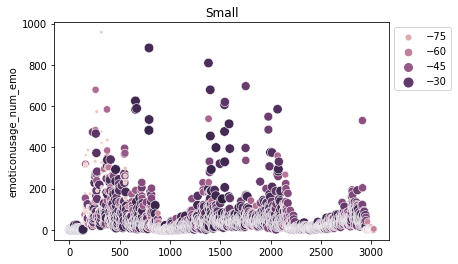

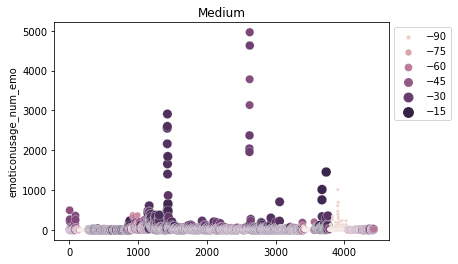

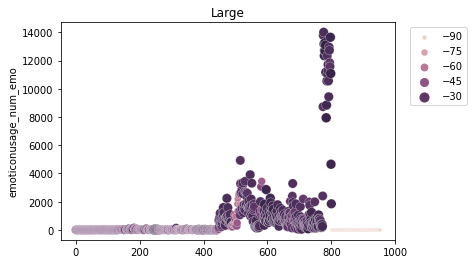

In [15]:
# Below the 3 levels of outliers are scatter-plotted with x=(video number),
# y=(number of emoticons), and the size/color representing the mean audio
# levels of the given clips

sns.scatterplot(data=df_sm, x=range(len(df_sm)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))

plt.legend(bbox_to_anchor= (1.2,1))
plt.title('Small')
plt.show()

mid  = sns.scatterplot(data=df_md, x=range(len(df_md)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))
plt.legend(bbox_to_anchor= (1.2,1))
plt.title('Medium')
plt.show()

high = sns.scatterplot(data=df_lg, x=range(len(df_lg)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))
plt.legend(bbox_to_anchor= (1.23,1))
plt.title('Large')
plt.show()

## Horizontal Outlier Exploration

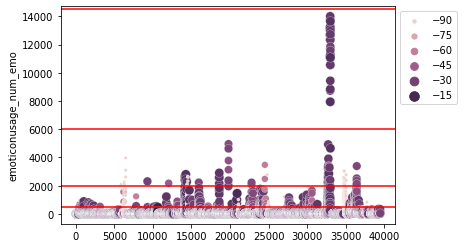

In [16]:
# The below graph is a scatter plot with x=(video number) and y=(number of emoticons)
# with the size/color representing the mean audio levels of the given clips

# In this section, we will be exploring the 3 key levels of outliers in the number of
# emoticons used in the non_ccc dataset

# Low End: ~500 to ~2000
# Mid End: ~2000 to ~6000
# High End: ~6000 to ~14000

plot = sns.scatterplot(data=non_ccc, x=range(len(non_ccc)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))
plot.axhline(y=500, color='r', linestyle='-')
plot.axhline(y=2000, color='r', linestyle='-')
plot.axhline(y=6000, color='r', linestyle='-')
plot.axhline(y=14500, color='r', linestyle='-')
plot.legend(bbox_to_anchor= (1.2,1))

In [17]:
# Isolating the 3 levels of outliers in the non_ccc dataset
# into their own subsets of low, mid, and high

df_low  = isolate_hori_df(non_ccc, 500, 2000).dropna()
df_mid  = isolate_hori_df(non_ccc, 2000, 6000).dropna()
df_high = isolate_hori_df(non_ccc, 6000, np.Inf).dropna()

### Direct Comparisons Horizontal

In [18]:
discard = ['min', '25%', '50%']

low = df_low.abs().describe().drop(index=discard).values
mid = df_mid.abs().describe().drop(index=discard).values
high = df_high.abs().describe().drop(index=discard).values


# df_mid subtracted by df_low
mid_sub_low = np.subtract(mid, low)
mid_sub_low = pd.DataFrame(np.subtract(mid, low),
                         columns=df_low.describe().drop(index=discard).columns,
                         index=df_low.describe().drop(index=discard).index)

# df_high subtracted by df_low
high_sub_low = np.subtract(high, low)
high_sub_low = pd.DataFrame(np.subtract(high, low),
                         columns=df_low.describe().drop(index=discard).columns,
                         index=df_low.describe().drop(index=discard).index)

# df_high subtracted by df_mid
high_sub_mid = np.subtract(high, mid)
high_sub_mid = pd.DataFrame(np.subtract(high, mid),
                         columns=df_low.describe().drop(index=discard).columns,
                         index=df_low.describe().drop(index=discard).index)

In [19]:
mid_sub_low

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.00000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000,-858.000000
mean,1762.886064,-7.152471,0.014258,14.445800,-969.916979,-7.152471,0.003711,0.013217,-5312.637551,2.784469,3.165570,3.22562,18.507254,9.777757,16.245744,954.115789,1762.886064,2717.001854
std,282.752400,1.451036,0.025831,24.542512,-178.723644,1.451036,0.003702,0.013054,-3959.819355,1.037209,-0.102782,0.22936,11.338701,7.738853,8.451509,888.881255,282.752400,987.972171
75%,1812.000000,14.500000,0.016784,8.914264,-1851.000000,14.500000,0.001912,0.004342,-3836.000000,4.067182,0.000000,0.00000,35.000000,19.250000,28.750000,2297.750000,1812.000000,4136.750000
max,2969.000000,-64.000000,0.066281,81.712258,-7918.000000,-64.000000,0.040245,-0.161831,-12627.000000,-50.519131,0.000000,0.00000,-2.000000,-20.000000,-14.000000,-7595.000000,2969.000000,-5734.000000


In [20]:
high_sub_low

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000,-925.000000
mean,10795.347368,-176.624211,0.009740,112.363477,-3355.112632,-176.624211,-0.006453,-0.003215,-12223.148421,14.488990,-24.049474,-27.155684,105.984211,16.102105,71.450526,-617.904211,10795.347368,10177.443158
std,1284.693247,-98.354769,-0.013813,21.225895,-2576.162516,-98.354769,-0.010783,-0.034652,-12526.340743,-1.227657,-25.933316,-32.109606,2.175313,-12.988478,-0.800929,-1551.530301,1284.693247,-427.545086
75%,11858.000000,-235.500000,0.013363,134.099394,-5690.000000,-235.500000,-0.013379,-0.012070,-15858.000000,15.283192,-66.000000,-78.400000,115.000000,17.000000,81.000000,-1368.250000,11858.000000,10111.750000
max,12017.000000,-461.000000,-0.171509,86.149880,-14965.000000,-461.000000,-0.067929,-0.599175,-43348.000000,-47.527737,-60.500000,-74.400000,43.000000,-94.000000,-24.000000,-17206.000000,12017.000000,-5218.000000


In [21]:
high_sub_mid

,emoticonusage_num_emo,emoticonusage_chunk_unique_users,emoticonusage_perc_emoji_of_stream,emoticonusage_emoji_user_ratio,uniqueusersengagement_hour_unique_users,uniqueusersengagement_chunk_unique_users,uniqueusersengagement_chunk_to_stream_unique_users,uniqueusersengagement_chunk_to_hour_unique_users,uniqueusersengagement_stream_unique_users,meanchatrateperuniqueusers_mean_chat_rate_per_minute,audiolevel_mean_volume,audiolevel_max_volume,activeusersengagement_num_chats_by_top_emoji_users,activeusersengagement_num_chats_by_top_words_users,activeusersengagement_num_chats_by_top_words_emoji_users,userengagement_num_words,userengagement_num_emo,userengagement_num_words_emo
count,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000,-67.000000
mean,9032.461304,-169.471739,-0.004518,97.917677,-2385.195652,-169.471739,-0.010164,-0.016432,-6910.510870,11.704520,-27.215043,-30.381304,87.476957,6.324348,55.204783,-1572.020000,9032.461304,7460.441304
std,1001.940847,-99.805805,-0.039644,-3.316616,-2397.438873,-99.805805,-0.014485,-0.047705,-8566.521388,-2.264866,-25.830534,-32.338966,-9.163389,-20.727332,-9.252438,-2440.411556,1001.940847,-1415.517256
75%,10046.000000,-250.000000,-0.003421,125.185130,-3839.000000,-250.000000,-0.015291,-0.016412,-12022.000000,11.216010,-66.000000,-78.400000,80.000000,-2.250000,52.250000,-3666.000000,10046.000000,5975.000000
max,9048.000000,-397.000000,-0.237790,4.437621,-7047.000000,-397.000000,-0.108174,-0.437344,-30721.000000,2.991394,-60.500000,-74.400000,45.000000,-74.000000,-10.000000,-9611.000000,9048.000000,516.000000


### Pearson's Correlation Coefficient Testing

In [22]:
# Below is the calculation of the Pearson's Correlation Coefficient
# of the 3 subsets and the resulting dataset

low  = to_pearson(df_low).rename(columns={'Pearson Corr Coefficient': 'low'})
mid  = to_pearson(df_mid).rename(columns={'Pearson Corr Coefficient': 'mid'})
high = to_pearson(df_high).rename(columns={'Pearson Corr Coefficient': 'high'})

pd.concat([low, mid, high], axis=1).sort_values(by=['high'], ascending=False)

,low,mid,high
emoticonusage_perc_emoji_of_stream,0.111741,0.002207,1.0
userengagement_num_words_emo,0.350225,0.400075,0.965146
emoticonusage_emoji_user_ratio,0.278359,0.500722,0.622046
meanchatrateperuniqueusers_mean_chat_rate_per_minute,0.156823,0.438748,0.544065
audiolevel_max_volume,0.062126,0.212619,0.177352
userengagement_num_words,0.182478,0.201377,0.115573
activeusersengagement_num_chats_by_top_words_users,0.249878,0.238833,0.114048
audiolevel_mean_volume,0.063767,0.19548,0.111825
emoticonusage_chunk_unique_users,0.148883,0.326447,0.093838
uniqueusersengagement_chunk_unique_users,0.148883,0.326447,0.093838


### Audio Level Testing

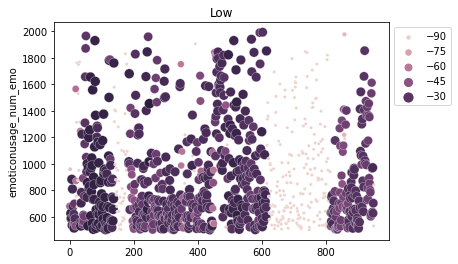

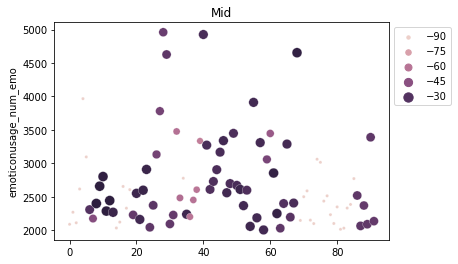

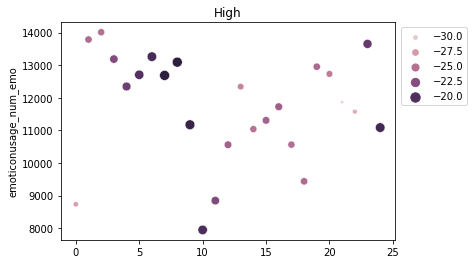

In [23]:
# Below the 3 levels of outliers are scatter-plotted with x=(video number),
# y=(number of emoticons), and the size/color representing the mean audio
# levels of the given clips (spoiler: there's not much to learn here)

sns.scatterplot(data=df_low, x=range(len(df_low)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))

plt.legend(bbox_to_anchor= (1.2,1))
plt.title('Low')
plt.show()

mid  = sns.scatterplot(data=df_mid, x=range(len(df_mid)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))
plt.legend(bbox_to_anchor= (1.2,1))
plt.title('Mid')
plt.show()

high = sns.scatterplot(data=df_high, x=range(len(df_high)), y='emoticonusage_num_emo', size='audiolevel_mean_volume', hue='audiolevel_mean_volume', sizes=(10, 100))
plt.legend(bbox_to_anchor= (1.23,1))
plt.title('High')
plt.show()